In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import pydicom
import SimpleITK as sitk
import imageio as iio

dataset found from kaggle

In [2]:
nii_path = r'D:\Shikhar\VS Code Programs\Brain Spy BCS\Week2\Sample Data\NIfTI\BRAINIX_NIFTI_T1.nii.gz'
dicom_folder = r'D:\Shikhar\VS Code Programs\Brain Spy BCS\Week2\Sample Data\T1'

## Using ImageIO 

In [3]:
brain_slice = iio.imread(dicom_folder , 'DICOM')
type(brain_slice)


Reading DICOM (examining files): 1/22 files (4.5%22/22 files (100.0%)
  Found 1 correct series.


C:\Users\Shikhar Gupta\AppData\Local\Temp\ipykernel_200204\641626239.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  brain_slice = iio.imread(dicom_folder , 'DICOM')


imageio.core.util.Array

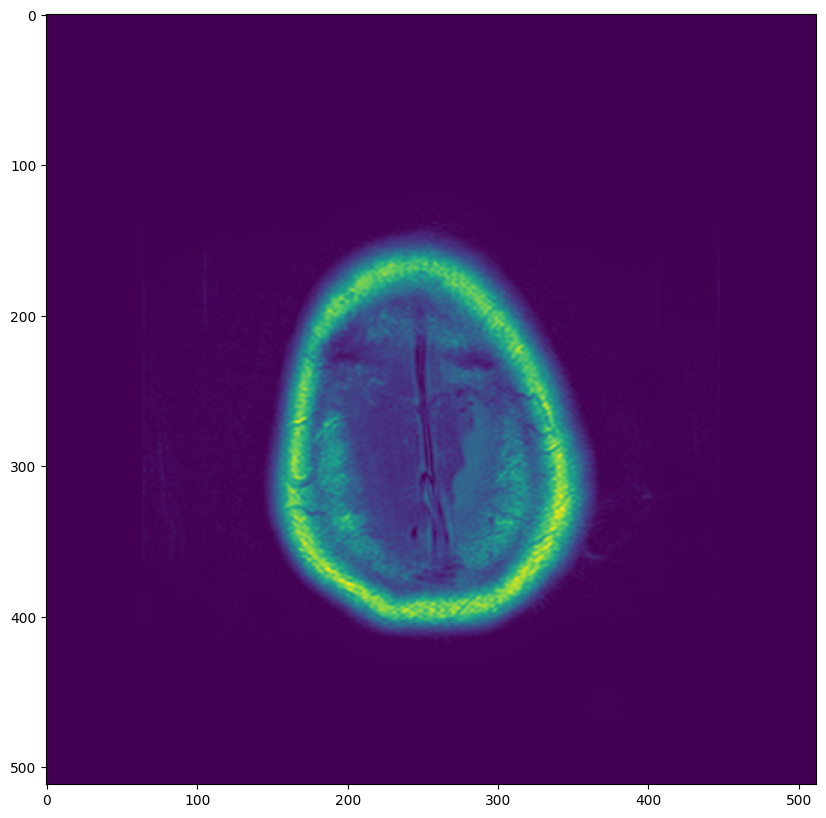

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.imshow(brain_slice)

notes - apparently imageio can't read brain-vol if the dcm folder has even a single file of different extension (here i had .ds_store)

In [5]:
brain_vol = iio.volread('D:\Shikhar\VS Code Programs\Brain Spy BCS\Week2\Sample Data\T1' , 'DICOM')

Reading DICOM (examining files): 1/22 files (4.5%22/22 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 22/22  (100.0%)


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Shikhar Gupta\AppData\Local\Temp\ipykernel_200204\752629704.py:1: SyntaxWarning: invalid escape sequence '\S'
  brain_vol = iio.volread('D:\Shikhar\VS Code Programs\Brain Spy BCS\Week2\Sample Data\T1' , 'DICOM')


In [6]:
brain_vol.shape

(22, 512, 512)

I couldnt find a better dicom file than this


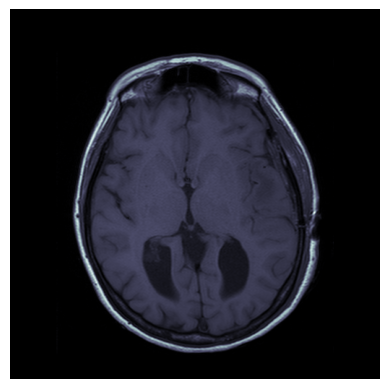

In [7]:
plt.imshow(brain_vol[11], cmap='bone')
plt.axis('off')
plt.show()

#### THICC Boi ↑
#### smol boi ↓
   

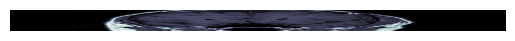

In [8]:
plt.imshow(brain_vol[:, 200], cmap='bone')
plt.axis('off')
plt.show()

## Using Nibabel

In [9]:
nii_img = nib.load(nii_path)
nii_data = nii_img.get_fdata()

print(f"NIfTI data shape: {nii_data.shape}")
print(f"Data type: {nii_data.dtype}")

NIfTI data shape: (512, 512, 22)
Data type: float64


Printing the img given on github

(np.float64(-0.5), np.float64(383.5), np.float64(255.5), np.float64(-0.5))

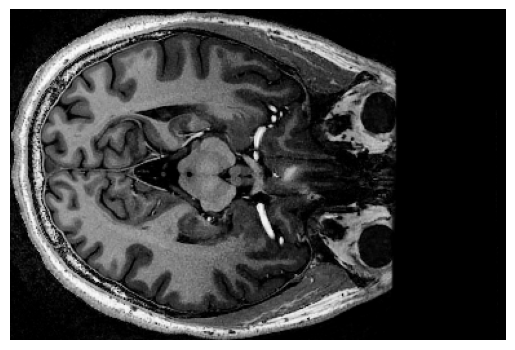

In [10]:
nii_img2 = nib.load('sub-65304_ses-1_acq-t1csmp2ragesag06mmUNIDEN_T1w.nii')
nii_data2 = nii_img2.get_fdata()
plt.imshow(nii_data2[:, :, 180], cmap='gray')
plt.axis('off')

Using Affine matrix (i dont understand its meaning)

In [11]:
affine = nii_img.affine
print("Affine matrix:")
print(affine)


Affine matrix:
[[-4.68615115e-01 -8.09912221e-04  1.43554196e-01  1.20884247e+02]
 [ 0.00000000e+00  4.67532486e-01  4.32169288e-01 -1.24125664e+02]
 [ 1.12443753e-02 -3.37535068e-02  5.98269463e+00 -2.51513786e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


### Image details

In [12]:
header = nii_img.header
print(f"Voxel dimensions (mm): {header.get_zooms()}")
print(f"Data shape: {header.get_data_shape()}")
print(f"Data type: {header.get_data_dtype()}")

Voxel dimensions (mm): (np.float32(0.46875), np.float32(0.46875), np.float32(6.000001))
Data shape: (512, 512, 22)
Data type: int16


Patient Name: BRAINIX
Modality: MR
Image shape (rows, cols): 512 x 512


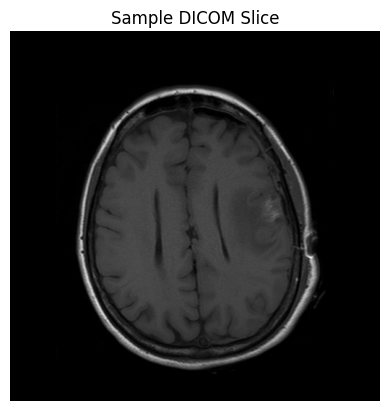

In [13]:
sample_dcm = pydicom.dcmread(os.path.join(dicom_folder, 'BRAINIX_DICOM_T1_IM-0001-0009.dcm'))
print(f"Patient Name: {sample_dcm.get('PatientName', 'N/A')}")
print(f"Modality: {sample_dcm.Modality}")
print(f"Image shape (rows, cols): {sample_dcm.Rows} x {sample_dcm.Columns}")

plt.imshow(sample_dcm.pixel_array, cmap='gray')
plt.title('Sample DICOM Slice')
plt.axis('off')
plt.show()

all metadata

In [14]:
print(sample_dcm)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 210
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006120114374418592
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002,0013) Implementation Version Name         SH: 'OSIRIX'
(0002,0016) Source Application Entity Title     AE: 'OSIRIX'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008,0012) Instance Creation Date              DA: '20061201'
(0008,0013) Instance Creation Time              TM: '145331.000000'
(0008,0014) Instance Creat

In [15]:
dicom_files = [f for f in os.listdir(dicom_folder) if f.lower().endswith('.dcm')]
slices = []
for f in dicom_files:
    ds = pydicom.dcmread(os.path.join(dicom_folder, f))
    slices.append(ds)
slices.sort(key=lambda x: int(x.InstanceNumber))
volume_manual = np.stack([s.pixel_array for s in slices])
print(f"Manually stacked volume shape: {volume_manual.shape}")

Manually stacked volume shape: (22, 512, 512)


SimpleITK

In [16]:
reader = sitk.ImageSeriesReader()
series_ids = reader.GetGDCMSeriesIDs(dicom_folder)
print(f"Found Series IDs: {series_ids}")

series_file_names = reader.GetGDCMSeriesFileNames(dicom_folder, series_ids[0])
reader.SetFileNames(series_file_names)

dicom_image = reader.Execute()
volume_np = sitk.GetArrayFromImage(dicom_image) 
print(f"DICOM volume shape (slices, height, width): {volume_np.shape}")


Found Series IDs: ('1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006120114333440565',)
DICOM volume shape (slices, height, width): (22, 512, 512)


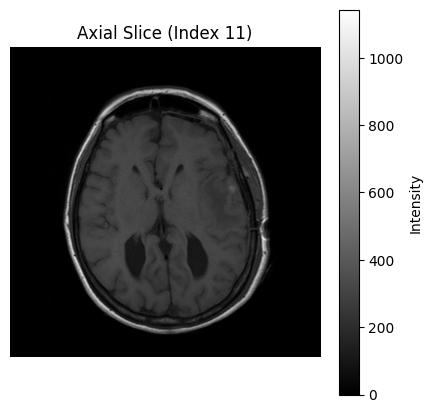

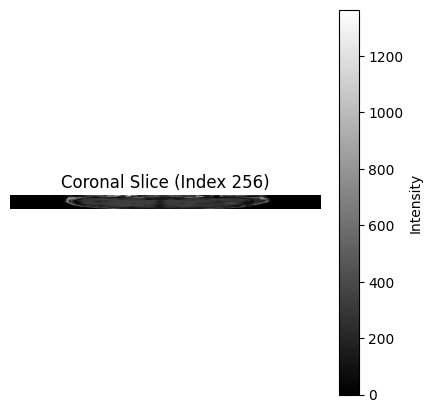

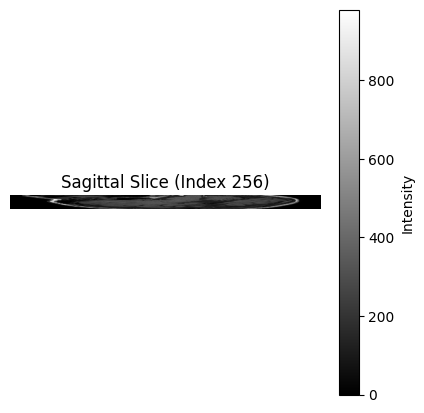

In [17]:
axial_index = volume_np.shape[0] // 2
plt.figure(figsize=(5,5))
plt.imshow(volume_np[axial_index, :, :], cmap='gray')
plt.title(f'Axial Slice (Index {axial_index})')
plt.axis('off')
plt.colorbar(label='Intensity')
plt.show()

## 6.2 Plotting a Coronal Slice

# Coronal view: fix second dimension index
coronal_index = volume_np.shape[1] // 2
plt.figure(figsize=(5,5))
plt.imshow(volume_np[:, coronal_index, :], cmap='gray')
plt.title(f'Coronal Slice (Index {coronal_index})')
plt.axis('off')
plt.colorbar(label='Intensity')
plt.show()


## 6.3 Plotting a Sagittal Slice

# Sagittal view: fix third dimension index
sagittal_index = volume_np.shape[2] // 2
plt.figure(figsize=(5,5))
plt.imshow(volume_np[:, :, sagittal_index], cmap='gray')
plt.title(f'Sagittal Slice (Index {sagittal_index})')
plt.axis('off')
plt.colorbar(label='Intensity')
plt.show()


ye kya hai, ye kyun hai (┬┬﹏┬┬)

In [18]:
affine = nii_img.affine
directions = affine[:3, :3]
print("NIfTI orientation (direction cosines):")
print(directions)

NIfTI orientation (direction cosines):
[[-4.68615115e-01 -8.09912221e-04  1.43554196e-01]
 [ 0.00000000e+00  4.67532486e-01  4.32169288e-01]
 [ 1.12443753e-02 -3.37535068e-02  5.98269463e+00]]
